<!--NAVIGATION-->
< [Introduction](1_Introduction.ipynb) | [Contents](0_Contents.ipynb) | [Camera calibration](3_camera_calibration.ipynb) >

# Quick Jupyter notebook tutorial
- types of cells
- usefull shortcuts
- simple example if image processing with OpenCV 

# Importing packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

# Reading and displaying an image
Compare output image from:

and:

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


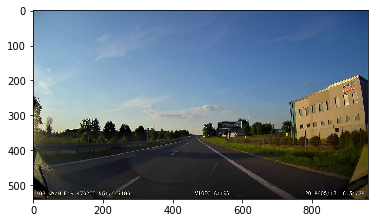

In [2]:
#reading in an image

image = mpimg.imread('test_images/straight_right_lane_1979.png')
#image = cv2.imread('test_images/straight_right_lane_1979.png')

# resizing of the image:
# fx = 0.5
# fy = 0.5
# image = cv2.resize(image,(0,0), fx=fx, fy=fy)

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

# Basic image operations



Test following basic image operations:

- convert to greyscale
- region of interest
- fill polygon region 
- gaussian blurr
- canny transform
- hough transform

Find out in OpenCV documentation (https://docs.opencv.org/) how to use respective functions:

Useful openCV tutorials can be found:
https://docs.opencv.org/master/d9/df8/tutorial_root.html

Image processing tutorials: https://docs.opencv.org/master/d7/da8/tutorial_table_of_content_imgproc.html


## Smoothing images - theory
Smoothing images: https://docs.opencv.org/master/dc/dd3/tutorial_gausian_median_blur_bilateral_filter.html


Example of Gausian blur:

In [3]:
img = cv2.imread("test_images/straight_middle_lane_2961.png")
# resizing
# fx = 0.5
# fy = 0.5
# img = cv2.resize(img,(0,0), fx=fx, fy=fy)

window_name = 'Gaussian blur'
title_trackbar = 'Kernel size:'
MAX_KERNEL_LENGTH = 31

def gaussian_blur(kernel_size):
    """Applies a Gaussian Noise kernel"""
    if kernel_size%2 == 0:
        kernel_size+=1
    
    dst = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
    cv2.imshow(window_name, dst)
    

cv2.namedWindow(window_name)
cv2.createTrackbar(title_trackbar, window_name , 1, MAX_KERNEL_LENGTH, gaussian_blur)

gaussian_blur(1)

cv2.waitKey()
cv2.destroyWindow(window_name) #in jupyter external window should be destroyed - otherwise the sesion will freeze

Other worth to know basic image operations:
- eroding and dilating, morphology transformations
- thresholding, adaptive thresholding
- Sobel, Laplace operators

# Exercise:
Test thresholding and adaptive thresholding with different parameters using trackbar from OpenCV.
Use `test_images/calib_board.png` image.


## Canny detector - theory
https://docs.opencv.org/master/da/d5c/tutorial_canny_detector.html


In [4]:
src = cv2.imread('test_images/straight_right_lane_1979.png')

# resizing:
# fx = 0.5
# fy = 0.5
# src = cv2.resize(src,(0,0), fx=fx, fy=fy)

src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

max_lowThreshold = 100

window_name = 'Edge Map'
title_trackbar = 'Min Threshold:'

ratio = 3
kernel_size = 3

def CannyThreshold(val):
    low_threshold = val
    
    img_blur = cv2.blur(src_gray, (3,3))
    
    detected_edges = cv2.Canny(img_blur, low_threshold, low_threshold*ratio, kernel_size)
    
    mask = detected_edges != 0
    dst = src * (mask[:,:,None].astype(src.dtype))
    
    cv2.imshow(window_name, dst)
    #cv2.imshow(window_name, detected_edges)

    
cv2.namedWindow(window_name)
cv2.createTrackbar(title_trackbar, window_name , 0, max_lowThreshold, CannyThreshold)
CannyThreshold(0)
cv2.waitKey()

cv2.destroyWindow(window_name)   #in jupyter external window should be destroyed - otherwise the sesion will freeze

# Processing sequence of images example
A script below is an example of reading image sequence.
Usage:
- `Esc` - breaks the sequence,
- `s` - writes a current image into the file,
- `space` - starts/stop saving into another sequence


In [6]:
# Import everything needed to edit/save/watch video clips
#from moviepy.editor import VideoFileClip
#from IPython.display import HTML
from tqdm import tqdm_notebook, tnrange, tqdm



# The script below opens a given image sequence 

#path to input sequence
inpath = "test_sequences/calibration_board_on_plane_2018_1220_004.MP4"

# output directory
dirPath = "out/"

window_name = 'road'

vc = cv2.VideoCapture(inpath)

#code = cv2.VideoWriter_fourcc('M','P','G','4')
code = cv2.VideoWriter_fourcc('M','J','P','G') # get fourcc code of compressed images stream

print("code: ", code)

resize = False # if True images will be resized (downsampled twice):
if resize:
    fx = 0.5
    fy = 0.5
else:
    fx = 1.
    fy = 1.
    
# The script below opens a given image sequence 

if vc.isOpened():
    framesNumber = vc.get(cv2.CAP_PROP_FRAME_COUNT) #get number of frames
    
    print("Frame count is: ", framesNumber)
    
    
    ex = int(vc.get(cv2.CAP_PROP_FOURCC))
    fps = vc.get(cv2.CAP_PROP_FPS)
    saveSeq = False
    size = (int(vc.get(cv2.CAP_PROP_FRAME_WIDTH)), int(vc.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    
    size = (int(fx * size[0]), int(fy * size[1]))
    
    print ("size: ", size)
    print ("fps: ", fps)
    print ("fourcc: ", ex)
    
    start = True
    
    
    for i in tnrange(int(framesNumber)):
        ret, img = vc.read()
        
        img = cv2.resize(img,(0,0), fx=fx, fy=fy)
        
        imgShow = cv2.resize(img,(0,0), fx=0.5, fy=0.5)

        if ret:                        
            cv2.imshow(window_name, imgShow)
            
            if start:
                k = cv2.waitKey()                
                start = False
            else:
                k = cv2.waitKey(2)
            
            
            if k == 112: # 'p'
                print('Pause')
                k = cv2.waitKey()
            
            #if k != -1:
            #    print("key pressed: ", k)
            
            if k == 27:
                print("break")
                break
                
            if k == 115: # 's'
                path = dirPath+"out_im_" + str(i) + ".png"
                cv2.imwrite(path, img)               
                print("image saved: ", path)
                
            if k == 32 and saveSeq == False:
                k = -1
                path = dirPath+"out_seq_" + str(i) + ".MP4"
                vw = cv2.VideoWriter(path, code, fps, size)
                
                if vw.isOpened():
                    print("start saving seq: ", path)
                    saveSeq = True
                else:
                    print("could not save seq...")
                
            if saveSeq:
                vw.write(img)
                
            if k == 32 and saveSeq == True:
                saveSeq = False
                k = -1
                vw.release()
                print("stop saving seq... ")

    cv2.destroyWindow(window_name) #in jupyter external window should be destroyed - otherwise the sesion will freeze

else:
    print("could not open the file..")

code:  1196444237
Frame count is:  238.0
size:  (1920, 1080)
fps:  60.0
fourcc:  828601953


Pause
Pause
Pause
image saved:  out/out_im_178.png



# Hough transform - lines detecting
Theory: https://docs.opencv.org/master/d9/db0/tutorial_hough_lines.html

## Exercise
Write a procedure detecting road lanes in an image: `test_images/straight_left_lane_895.png`
- define typical ROI (list of vertices) in the image from front car camera where the lanes should be visible,
- using `cv2.fillPoly` and `cv2.bitwise_and` extract from the image the ROI for lane detection,
- using `cv2.GaussianBlur`, `cv2.Canny`, `cv2.HoughLinesP` detect the lanes.
- group the lines provided by `cv2.HoughLinesP` into left and right lane and draw them,
- run the procedure for the sequence of images: `test_sequences/straight_left_lane_651.MP4`.

<!--NAVIGATION-->
< [Introduction](1_Introduction.ipynb) | [Contents](0_Contents.ipynb) | [Camera calibration](3_camera_calibration.ipynb) >